<a href="https://colab.research.google.com/github/nataliavlrom/terver/blob/main/terver_lesson7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.**

In [ ]:
# расчет вручную с интерсептом

In [ ]:
import numpy as np

In [ ]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
zp

array([ 35,  45, 190, 200,  40,  70,  54, 150, 120, 110])

In [ ]:
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
ks

array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

In [ ]:
x = zp
x

array([ 35,  45, 190, 200,  40,  70,  54, 150, 120, 110])

In [ ]:
y = ks
y

array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

In [ ]:
b = (np.mean(x * y) - np.mean(x) * np.mean(y)) / (np.mean(x ** 2) - np.mean(x) ** 2) 
b

2.620538882402765

In [ ]:
n = len(x)
n

10

In [ ]:
b = (n * (np.sum(x * y)) - (np.sum(x) * np.sum(y))) / (n * (np.sum(x ** 2)) - (np.sum(x) ** 2))
b

2.6205388824027653

In [ ]:
a = np.mean(y) - b * np.mean(x)
a

444.17735732435955

In [ ]:
y_hat = 444.18 + 2.62 * x
y_hat

array([535.88, 562.08, 941.98, 968.18, 548.98, 627.58, 585.66, 837.18,
       758.58, 732.38])

In [ ]:
y

array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, 'кредитный скоринг')

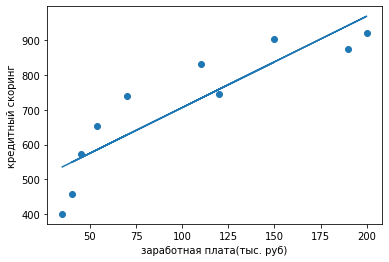

In [ ]:
plt.scatter(x, y)
plt.plot(x, 444.18 + 2.62 * x)
plt.xlabel('заработная плата(тыс. руб)')
plt.ylabel('кредитный скоринг')

In [ ]:
mse = ((y - y_hat)**2).sum() / n
       
mse

6470.417919999998

In [ ]:
# матричным методом с интерсептом

In [ ]:
import seaborn as sns

In [ ]:
x = x.reshape((10, 1))
x

array([[ 35],
       [ 45],
       [190],
       [200],
       [ 40],
       [ 70],
       [ 54],
       [150],
       [120],
       [110]])

In [ ]:
y = y.reshape((10, 1))
y

array([[401],
       [574],
       [874],
       [919],
       [459],
       [739],
       [653],
       [902],
       [746],
       [832]])

In [ ]:
x = np.hstack([np.ones((10,1)), x])
x

array([[  1.,  35.],
       [  1.,  45.],
       [  1., 190.],
       [  1., 200.],
       [  1.,  40.],
       [  1.,  70.],
       [  1.,  54.],
       [  1., 150.],
       [  1., 120.],
       [  1., 110.]])

In [ ]:
b = np.dot(np.linalg.inv(np.dot(x.T, x)), x.T@y)
b

array([[444.17735732],
       [  2.62053888]])

In [ ]:
# матричным методом без интерсепта

In [ ]:
x = zp
x

array([ 35,  45, 190, 200,  40,  70,  54, 150, 120, 110])

In [ ]:
x = x.reshape((10, 1))
x

array([[ 35],
       [ 45],
       [190],
       [200],
       [ 40],
       [ 70],
       [ 54],
       [150],
       [120],
       [110]])

In [ ]:
y = ks
y

array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

In [ ]:
y = y.reshape((10,1))
y

array([[401],
       [574],
       [874],
       [919],
       [459],
       [739],
       [653],
       [902],
       [746],
       [832]])

In [ ]:
b = np.dot(np.linalg.inv(np.dot(x.T, x)), x.T@y)
b

array([[5.88982042]])

In [ ]:
y_hat = 5.89 * x
y_hat

array([[ 206.15],
       [ 265.05],
       [1119.1 ],
       [1178.  ],
       [ 235.6 ],
       [ 412.3 ],
       [ 318.06],
       [ 883.5 ],
       [ 706.8 ],
       [ 647.9 ]])

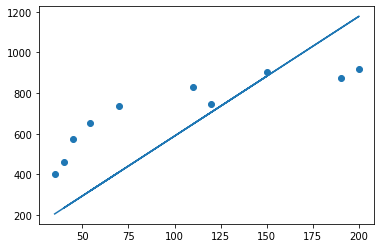

In [ ]:
plt.scatter(x, y)
plt.plot(x, 5.89 * x)


**Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).**

In [ ]:
x = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
x

array([ 35,  45, 190, 200,  40,  70,  54, 150, 120, 110])

In [ ]:
y = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
y

array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

In [ ]:
def mse_(b1, y=y, x=x, n = 10):
  return np.sum((b1 * x - y)**2) / n

In [ ]:
alfa = 1e-6
alfa

1e-06

In [ ]:
 # mse = (1/n) * np.sum((b1*x - y)**2)

In [ ]:
# mse_p = (2/n) * np.sum((b1*x - y) * x)

In [ ]:
b1 = 0.1

In [ ]:
n = 10

In [ ]:
for i in range(10):
  b1 -=alfa*(2/n) * np.sum((b1*x - y) * x)
  print('b1={}'.format(b1))

b1=0.25952808
b1=0.414660650906144
b1=0.5655188230595969
b1=0.7122203698240712
b1=0.8548798195302346
b1=0.9936085448867542
b1=1.1285148499277806
b1=1.2597040545647504
b1=1.387278576808517
b1=1.5113380127259965


In [ ]:
for i in range(100):
  b1 -=alfa*(2/n) * np.sum((b1*x - y) * x)
  if i%10==0:
    print(f'iteration:{i} b1={b1},mse={mse_(b1)}')

iteration:0 b1=5.889820420132673,mse=56516.85841571943
iteration:10 b1=5.889820420132673,mse=56516.85841571943
iteration:20 b1=5.889820420132673,mse=56516.85841571943
iteration:30 b1=5.889820420132673,mse=56516.85841571943
iteration:40 b1=5.889820420132673,mse=56516.85841571943
iteration:50 b1=5.889820420132673,mse=56516.85841571943
iteration:60 b1=5.889820420132673,mse=56516.85841571943
iteration:70 b1=5.889820420132673,mse=56516.85841571943
iteration:80 b1=5.889820420132673,mse=56516.85841571943
iteration:90 b1=5.889820420132673,mse=56516.85841571943


In [ ]:
for i in range(3000):
  b1 -=alfa*(2/n) * np.sum((b1*x - y) * x)
  if i%500==0:
    print(f'iteration:{i} b1={b1},mse={mse_(b1)}')

iteration:0 b1=5.889820420132673,mse=56516.85841571943
iteration:500 b1=5.889820420132673,mse=56516.85841571943
iteration:1000 b1=5.889820420132673,mse=56516.85841571943
iteration:1500 b1=5.889820420132673,mse=56516.85841571943
iteration:2000 b1=5.889820420132673,mse=56516.85841571943
iteration:2500 b1=5.889820420132673,mse=56516.85841571943


**В каких случаях для вычисления доверительных интервалов и проверки статистических гипотез используется таблица значений функции Лапласа, а в каких - таблица критических точек распределения Стьюдента?**

**4. Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).**

In [ ]:
x

array([ 35,  45, 190, 200,  40,  70,  54, 150, 120, 110])

In [ ]:
y

array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

In [ ]:
def mse_(b1, y=y, x=x, n = 10):
  return np.sum((b0 + b1 * x - y)**2) / n

In [ ]:
b0 = 0.1

In [ ]:
b1 = 0.1

In [ ]:
n = 10

In [ ]:
alfa = 1e-5

In [ ]:
for i in range(1000000):
  b0 -= alfa*(2/n)*np.sum(b0 + b1*x - y)
  b1 -=alfa*(2/n) * np.sum((b0 + b1*x - y) * x)
  if i%100000==0:
    print(f'iteration:{i}, b0={b0} b1={b1},mse={mse_(b1)}')

iteration:0, b0=444.17735732323916 b1=2.620538882411012,mse=6470.414201176657
iteration:100000, b0=444.17735732323916 b1=2.620538882411012,mse=6470.414201176657
iteration:200000, b0=444.17735732323916 b1=2.620538882411012,mse=6470.414201176657
iteration:300000, b0=444.17735732323916 b1=2.620538882411012,mse=6470.414201176657
iteration:400000, b0=444.17735732323916 b1=2.620538882411012,mse=6470.414201176657
iteration:500000, b0=444.17735732323916 b1=2.620538882411012,mse=6470.414201176657
iteration:600000, b0=444.17735732323916 b1=2.620538882411012,mse=6470.414201176657
iteration:700000, b0=444.17735732323916 b1=2.620538882411012,mse=6470.414201176657
iteration:800000, b0=444.17735732323916 b1=2.620538882411012,mse=6470.414201176657
iteration:900000, b0=444.17735732323916 b1=2.620538882411012,mse=6470.414201176657
